In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Rahulrex069/Datatrained-Projects/main/Evaluation%20Project%20Week%203/Data_Train.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL _ LKO _ BOM _ COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU _ NAG _ BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR _ NAG _ DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU _ BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU _ BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR _ DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR _ DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As we can see, Route and Total_Stops each has only one missing value, which we can fill with the Mode as both are categorical variables.

In [4]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

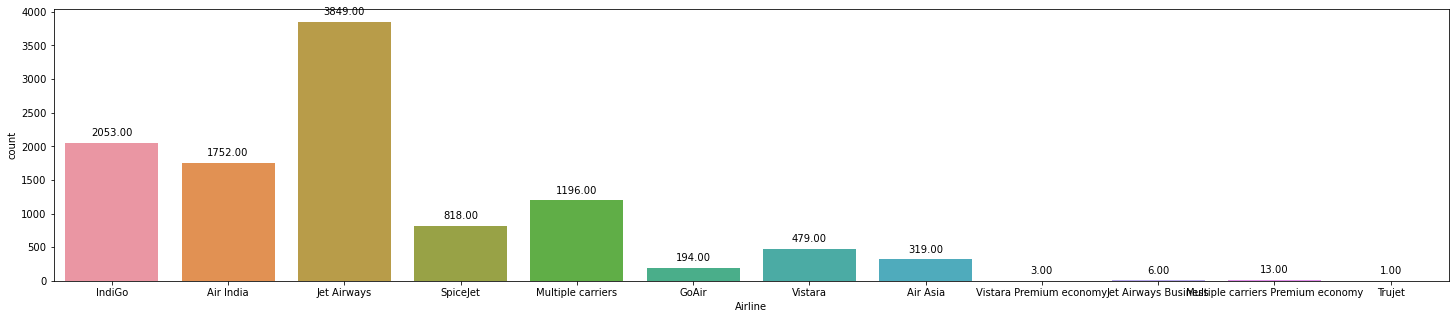

In [5]:
plt.figure(figsize=[25,5])
A =sns.countplot(data=df, x= 'Airline')
for p in A.patches:
    A.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The highest flight records are of Jet airways airline i.e. 3849 whereas the lowest is of Trujet which is only one.

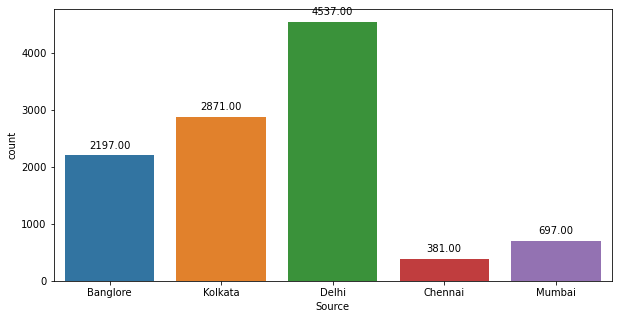

In [6]:
plt.figure(figsize=[10,5])
S =sns.countplot(data=df, x= 'Source')
for p in S.patches:
    S.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Delhi is the most used source airport as per the dataset whereas chennai is the least used.

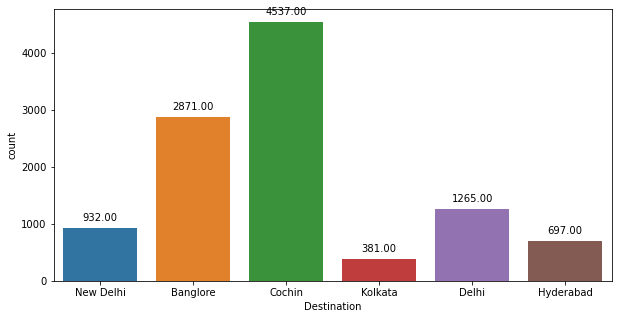

In [7]:
plt.figure(figsize=[10,5])
D =sns.countplot(data=df, x= 'Destination')
for p in D.patches:
    D.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Cochin is the most used destination airport as per the dataset whereas Kolkata is the least used.

In [8]:
df['Route'].value_counts()

DEL _ BOM _ COK                2377
BLR _ DEL                      1552
CCU _ BOM _ BLR                 979
CCU _ BLR                       724
BOM _ HYD                       621
                               ... 
BLR _ HBX _ BOM _ AMD _ DEL       1
BOM _ JDH _ JAI _ DEL _ HYD       1
BOM _ DED _ DEL _ HYD             1
CCU _ IXB _ DEL _ BLR             1
BOM _ CCU _ HYD                   1
Name: Route, Length: 128, dtype: int64

In [9]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
35h 35m      1
41h 20m      1
32h 20m      1
29h 30m      1
30h 25m      1
Name: Duration, Length: 368, dtype: int64

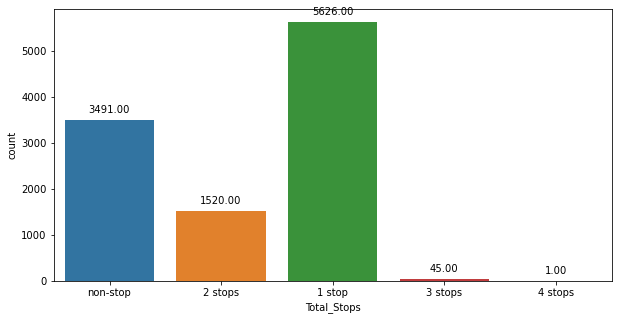

In [10]:
plt.figure(figsize=[10,5])
T =sns.countplot(data=df, x= 'Total_Stops')
for p in T.patches:
    T.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

As per data, 5626 number of flights had only one stop, 3491 flights were non-stop. There was only one flight with the highest number of stops which were 4.

In [11]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [12]:
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [13]:
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [14]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,Day
0,IndiGo,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL _ LKO _ BOM _ COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU _ NAG _ BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR _ NAG _ DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU _ BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU _ BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4,27
10680,Jet Airways,Banglore,Delhi,BLR _ DEL,08:20,11:20,3h,non-stop,No info,7229,4,27
10681,Vistara,Banglore,New Delhi,BLR _ DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [15]:
df['Duration_minutes'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(int)
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Duration', 'Dep_Time', 'Arrival_Time' ], axis=1, inplace=True)

1. The Duration is in the format of HH:MM which will not be useful in this format, so i will convert that column into the minutes only and drop the original column.
2. Same goes for Arrival_Time and Dep_Time, so i will make seperate columns for hours and minutes for both of the columns and drop the original columns.

In [16]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,Day,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR _ DEL,non-stop,No info,3897,3,24,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,2 stops,No info,7662,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL _ LKO _ BOM _ COK,2 stops,No info,13882,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU _ NAG _ BLR,1 stop,No info,6218,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR _ NAG _ DEL,1 stop,No info,13302,1,3,285,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU _ BLR,non-stop,No info,4107,9,4,150,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU _ BLR,non-stop,No info,4145,4,27,155,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR _ DEL,non-stop,No info,7229,4,27,180,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR _ DEL,non-stop,No info,12648,1,3,160,11,30,14,10


In [17]:
#To display plot in center
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<AxesSubplot:xlabel='Source', ylabel='Price'>

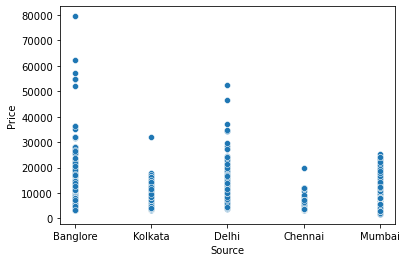

In [18]:
sns.scatterplot(x = 'Source', y='Price', data=df)

The highest price rates were mostly obersved where the souce is Banglore.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

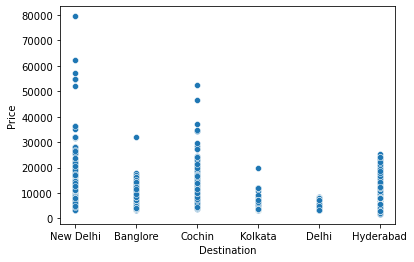

In [19]:
sns.scatterplot(x = 'Destination', y='Price', data=df)

The highest price rates were mostly obersved where the Destination is New Delhi.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

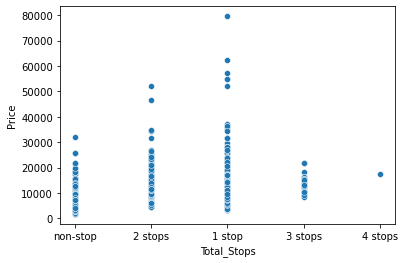

In [20]:
sns.scatterplot(x = 'Total_Stops', y='Price', data=df)

The highest price rates were obersved where the stop is only one.

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

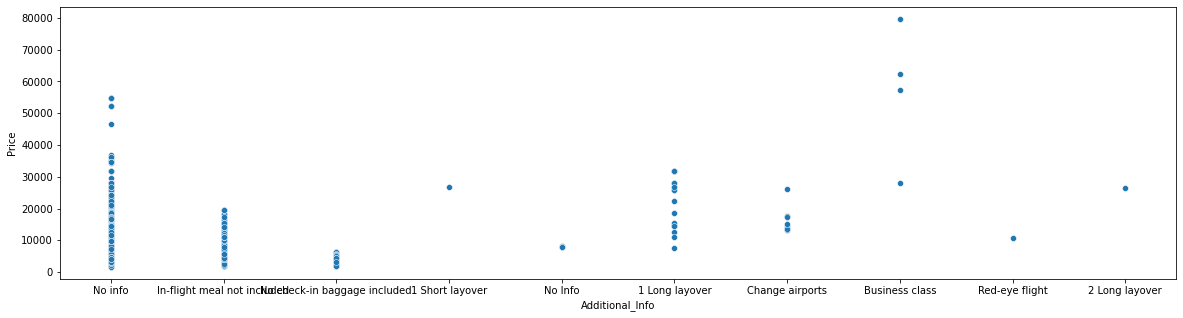

In [21]:
plt.figure(figsize=[20,5])
sns.scatterplot(x = 'Additional_Info', y='Price', data=df)

Additional_info has no uniformity in the data, some records are showing layovers, some showing class of travel, some showing change of ariports, which do not make sense. Hence I am going to drop that column.

In [22]:
df.drop(["Additional_Info"], axis=1, inplace=True )

In [23]:
df.describe()

,Price,month,Day,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,5.534775,12.682205,492.124403,12.490686,24.411214,13.348778,24.690630
std,4611.359167,2.987489,8.803701,383.070347,5.748650,18.767980,6.859125,16.506036
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,3.000000,5.000000,165.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,5.000000,6.000000,380.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,6.000000,21.000000,755.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,12.000000,27.000000,1435.000000,23.000000,55.000000,23.000000,55.000000


1. Mean and median of all columns are very nearby except Day and Duration_minutes.
2. The deifference between 75% and max in case of price is extremely high which will lead the right skweness in the data distribution. Same goes for month and Duration_minutes.

In [24]:
df

,Airline,Source,Destination,Route,Total_Stops,Price,month,Day,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR _ DEL,non-stop,3897,3,24,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,2 stops,7662,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL _ LKO _ BOM _ COK,2 stops,13882,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU _ NAG _ BLR,1 stop,6218,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR _ NAG _ DEL,1 stop,13302,1,3,285,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU _ BLR,non-stop,4107,9,4,150,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU _ BLR,non-stop,4145,4,27,155,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR _ DEL,non-stop,7229,4,27,180,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR _ DEL,non-stop,12648,1,3,160,11,30,14,10


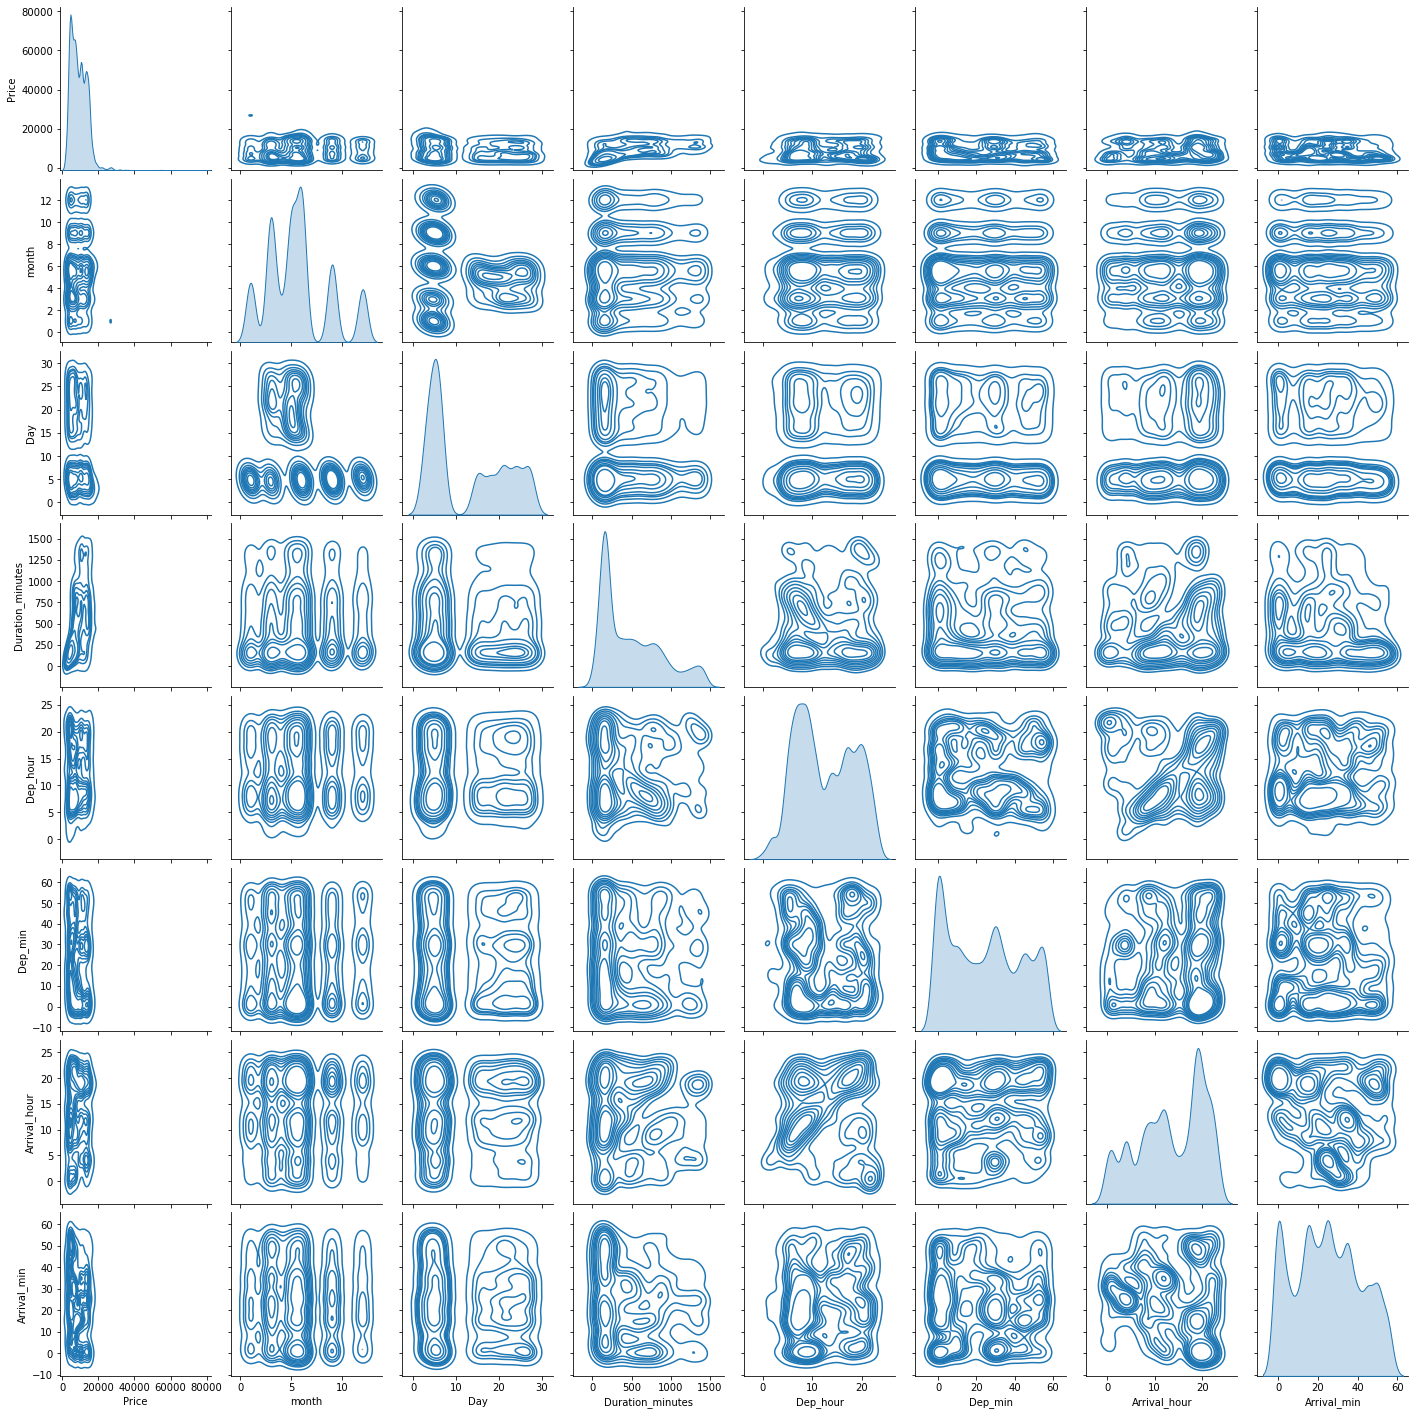

In [25]:
sns.pairplot(df, kind='kde')

<AxesSubplot:>

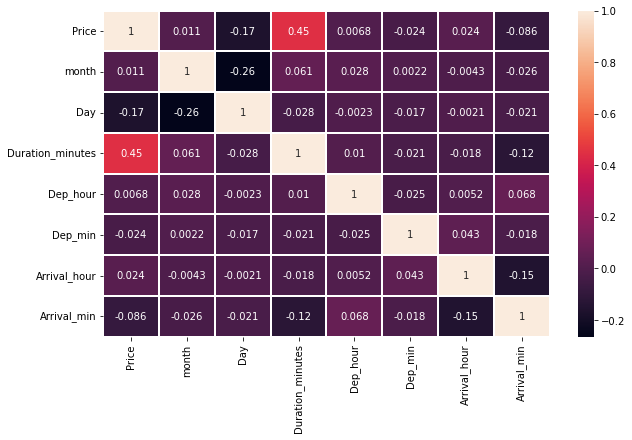

In [26]:
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(), annot=True, linewidth=1)

As we can see from pairplot and Correlation matrix, there is no problem of multicoleniarity.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Arrival_min', ylabel='Density'>

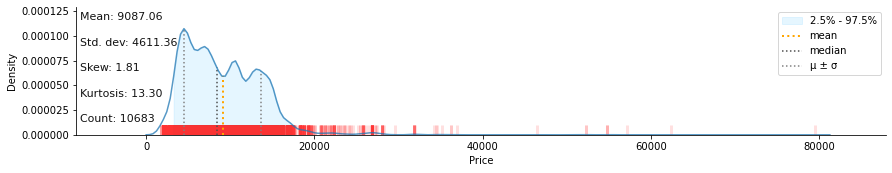

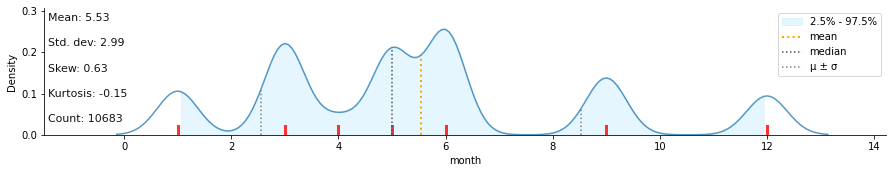

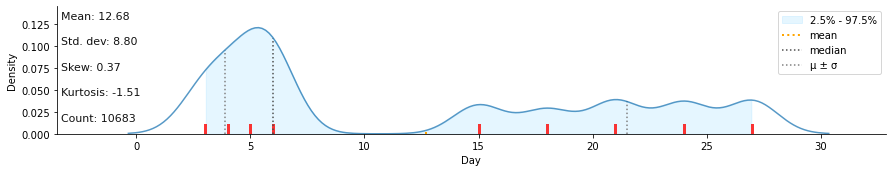

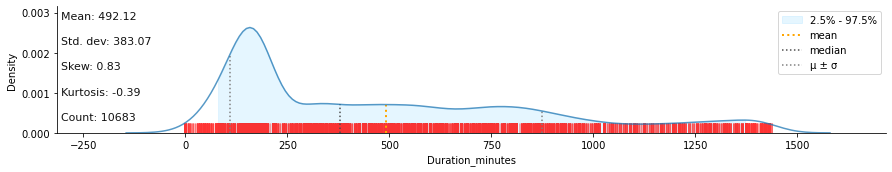

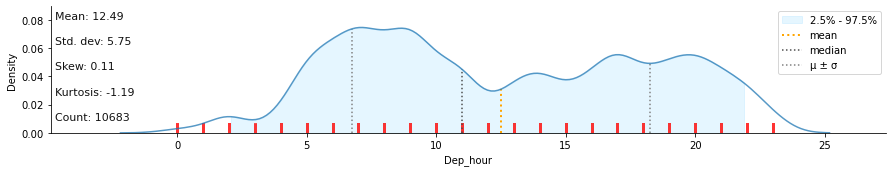

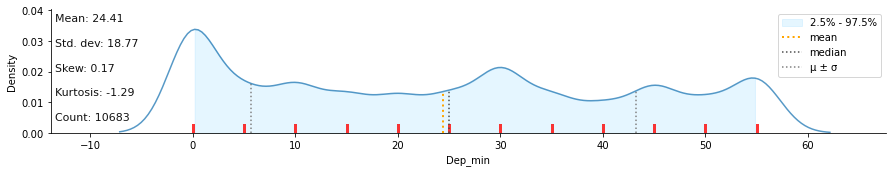

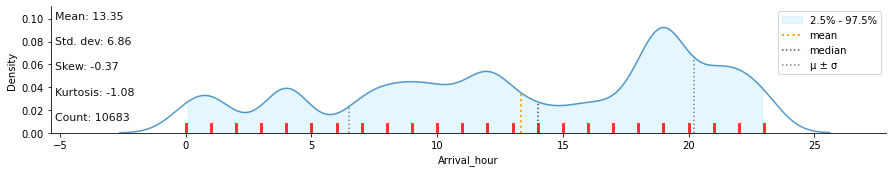

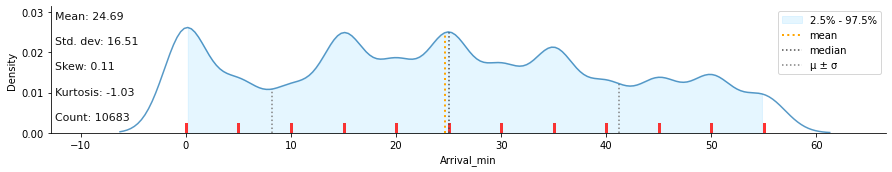

In [27]:
import klib
klib.dist_plot(df)

In [28]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)

In [29]:
df.skew()

Airline             0.731095
Source             -0.424054
Destination         1.244169
Route              -0.502066
Total_Stops         0.631681
Price               0.114408
month              -0.137820
Day                 0.136992
Duration_minutes    0.810961
Dep_hour            0.113073
Dep_min             0.167029
Arrival_hour       -0.369988
Arrival_min         0.110945
dtype: float64

From skew() and dustribution plot, we can see that the dataset has the skewness.

Now let us check the outliers if any in the columns which will help us to reduce the skewness in the data.

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

data_new=df[(z<3).all(axis=1)]
data_new.shape

(array([], dtype=int64), array([], dtype=int64))


(10683, 13)

When i checked for outliers with the Z score, we could not find any, hence to reduce the skewness i will try to do data transformation.

In [31]:
dfx = df.drop(['Price'], axis = 1)
dfx

,Airline,Source,Destination,Route,Total_Stops,month,Day,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,1,7,34,22,4,1,2
1,1,3,0,84,1,0,2,89,5,10,13,3
2,4,2,1,118,1,5,3,227,9,5,4,5
3,3,3,0,91,0,6,2,65,18,1,23,6
4,3,0,5,29,0,0,0,57,16,10,21,7
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,1,30,19,11,22,5
10679,1,3,0,64,4,2,8,31,20,9,23,4
10680,4,0,2,18,4,2,8,36,8,4,11,4
10681,10,0,5,18,4,0,0,32,11,6,14,2


In [32]:
y = df['Price']
y

0          65
1         669
2        1537
3         389
4        1457
         ... 
10678      81
10679      84
10680     604
10681    1377
10682    1262
Name: Price, Length: 10683, dtype: int64

In [33]:
from sklearn.preprocessing import power_transform
x = power_transform(dfx, method = "yeo-johnson")
x

array([[-0.29549976, -1.59971174,  1.75270286, ..., -0.04461676,
        -1.79077259, -0.83278465],
       [-1.42029981,  0.90206079, -1.3705449 , ...,  1.23154831,
        -0.05592099, -0.49063335],
       [ 0.14774467, -0.01210752,  0.00586149, ...,  0.20682131,
        -1.3625648 ,  0.11980848],
       ...,
       [ 0.14774467, -1.59971174,  0.70705306, ..., -0.04461676,
        -0.34804564, -0.17544129],
       [ 2.12289615, -1.59971174,  1.75270286, ...,  0.4383336 ,
         0.09041712, -0.83278465],
       [-1.42029981, -0.01210752,  0.00586149, ...,  1.40626101,
         0.82443163, -0.49063335]])

In [34]:
X = pd.DataFrame(x)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.295500,-1.599712,1.752703,-1.533562,1.293592,-1.095634,1.192004,-0.832877,1.545951,-0.044617,-1.790773,-0.832785
1,-1.420300,0.902061,-1.370545,0.230509,0.355606,-1.702729,-0.660838,0.200879,-1.356245,1.231548,-0.055921,-0.490633
2,0.147745,-0.012108,0.005861,1.199732,0.355606,1.073291,-0.235697,1.422964,-0.548142,0.206821,-1.362565,0.119808
3,-0.295500,0.902061,-1.370545,0.427672,-0.905745,1.582126,-0.660838,-0.159875,0.956409,-1.009131,1.413973,0.399444
4,-0.295500,-1.599712,1.752703,-1.256707,-0.905745,-1.702729,-1.707956,-0.303825,0.646735,1.231548,1.118972,0.666372
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-2.244150,0.902061,-1.370545,-0.324630,1.293592,1.073291,-1.137869,-0.952391,1.107271,1.406261,1.266418,0.119808
10679,-1.420300,0.902061,-1.370545,-0.324630,1.293592,-0.525219,1.506641,-0.921399,1.255717,1.048821,1.413973,-0.175441
10680,0.147745,-1.599712,0.707053,-1.533562,1.293592,-0.525219,1.506641,-0.777198,-0.738439,-0.044617,-0.348046,-0.175441
10681,2.122896,-1.599712,1.752703,-1.533562,1.293592,-1.702729,-1.707956,-0.891177,-0.184992,0.438334,0.090417,-0.832785


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x

array([[-0.29549976, -1.59971174,  1.75270286, ..., -0.04461676,
        -1.79077259, -0.83278465],
       [-1.42029981,  0.90206079, -1.3705449 , ...,  1.23154831,
        -0.05592099, -0.49063335],
       [ 0.14774467, -0.01210752,  0.00586149, ...,  0.20682131,
        -1.3625648 ,  0.11980848],
       ...,
       [ 0.14774467, -1.59971174,  0.70705306, ..., -0.04461676,
        -0.34804564, -0.17544129],
       [ 2.12289615, -1.59971174,  1.75270286, ...,  0.4383336 ,
         0.09041712, -0.83278465],
       [-1.42029981, -0.01210752,  0.00586149, ...,  1.40626101,
         0.82443163, -0.49063335]])

In [36]:
from sklearn.metrics import r2_score

maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2score = r2_score(y_test,pred)
    if r2score>maxscore:
        maxscore=r2score
        maxRS=i
print("Best r2 score is ", maxscore, 'on Random state ', maxRS)

Best r2 score is  0.4321897243107682 on Random state  120


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=120)

In [38]:
model=[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    r2sscore = r2_score(y_test,m_pred)
    MSE= mean_squared_error(y_test,m_pred)
    
    print(m)
    print(m.score(x_train,y_train))
    print('R2 score for :', m, 'is', r2sscore)
    print('Mean Squared Error for ',m ,"is:" ,MSE)
    print("\n")

LinearRegression()
0.397738318700661
R2 score for : LinearRegression() is 0.4321897243107682
Mean Squared Error for  LinearRegression() is: 182314.18797455519


KNeighborsRegressor()
0.8408026034550612
R2 score for : KNeighborsRegressor() is 0.7545507464908144
Mean Squared Error for  KNeighborsRegressor() is: 78809.56590327615


DecisionTreeRegressor()
0.9695901334695576
R2 score for : DecisionTreeRegressor() is 0.7504094422634182
Mean Squared Error for  DecisionTreeRegressor() is: 80139.26800572022


SVR()
0.27034370793871654
R2 score for : SVR() is 0.28735814411088934
Mean Squared Error for  SVR() is: 228817.13634962865


RandomForestRegressor()
0.9585731689847661
R2 score for : RandomForestRegressor() is 0.8401580569205499
Mean Squared Error for  RandomForestRegressor() is: 51322.519694508694




In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,y,cv=kfold)
    print(i, "CV Score is ",score.mean())

LinearRegression() CV Score is  0.40616229848188967
KNeighborsRegressor() CV Score is  0.7583768670115423
DecisionTreeRegressor() CV Score is  0.7563789013174729
SVR() CV Score is  0.2949573563679155
RandomForestRegressor() CV Score is  0.8407817770797383


All model have no diference in R2 score and CV score except LinearRegression() model, but when we look at the MSE, RandomForestRegressor has the lowest error and highest accuracy, hence i will go ahead with hyper parameter tuning on RandomForestRegressor.

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False] }

In [42]:
GSV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'oob_score': [True, False]})

In [43]:
GSV.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 14,
 'n_estimators': 19,
 'oob_score': False}

In [59]:
Final_Model = RandomForestRegressor(bootstrap= True, max_features= 'auto', min_samples_split= 14, n_estimators= 19, oob_score=False)
Final_Model.fit(x_train,y_train)
Final_Model.score(x_train,y_train)
model_pred=Final_Model.predict(x_test)
r2score = r2_score(y_test,model_pred)
MSE= mean_squared_error(y_test,model_pred)

print(Final_Model.score(x_train,y_train))
print('R2 score is :',r2score)
print('Mean Squared Error is ',MSE) 

0.9185460424875467
R2 score is : 0.862799296363181
Mean Squared Error is  44052.80415667303


With the help of Hyperparameter tuning i have achived accuracy upto 92% and r2 scor 0.86.

In [60]:
import joblib
joblib.dump(Final_Model,'Fligh_ticket_prediction.obj')

['Fligh_ticket_prediction.obj']

Finally I have saved model as  Fligh_ticket_prediction.obj. Now Let us improt the test dataset and make the price predictions for the same.

In [61]:
prediction_Data = pd.read_csv('https://raw.githubusercontent.com/Rahulrex069/Datatrained-Projects/main/Evaluation%20Project%20Week%203/Test_set.csv')
prediction_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [62]:
prediction_Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [63]:
prediction_Data['month'] = pd.DatetimeIndex(prediction_Data['Date_of_Journey']).month
prediction_Data['Day'] = pd.DatetimeIndex(prediction_Data['Date_of_Journey']).day
prediction_Data['Duration_minutes'] = (pd.to_timedelta(prediction_Data['Duration']).dt.seconds // 60).astype(int)
prediction_Data['Dep_hour'] = pd.to_datetime(prediction_Data['Dep_Time']).dt.hour
prediction_Data['Dep_min'] = pd.to_datetime(prediction_Data['Dep_Time']).dt.minute
prediction_Data['Arrival_hour'] = pd.to_datetime(prediction_Data['Arrival_Time']).dt.hour
prediction_Data['Arrival_min'] = pd.to_datetime(prediction_Data['Arrival_Time']).dt.minute

prediction_Data.drop(['Duration', 'Dep_Time', 'Arrival_Time', 'Date_of_Journey', 'Additional_Info'], axis=1, inplace=True)

In [64]:
prediction_Data

,Airline,Source,Destination,Route,Total_Stops,month,Day,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,6,6,655,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,12,5,240,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,5,21,1425,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,5,21,780,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,6,24,170,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,6,6,1435,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,3,27,155,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,6,3,395,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,6,3,915,4,0,19,15


In [65]:
from sklearn.preprocessing import LabelEncoder

prediction_Data = prediction_Data.apply(LabelEncoder().fit_transform)
prediction_Data

,Airline,Source,Destination,Route,Total_Stops,month,Day,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,0,4,3,130,17,6,4,5
1,3,3,0,65,0,6,2,47,6,4,10,4
2,4,2,1,76,0,3,6,264,19,3,19,0
3,6,2,1,76,0,3,6,155,8,0,21,0
4,0,0,2,16,4,4,7,34,23,11,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,3,266,20,6,20,5
2667,3,3,0,43,4,1,8,31,14,4,16,11
2668,4,2,1,76,0,4,0,78,21,10,4,5
2669,1,2,1,76,0,4,0,181,4,0,19,3


In [66]:
from sklearn.preprocessing import power_transform
x = power_transform(prediction_Data, method = "yeo-johnson")
x

array([[ 0.12169898, -0.02026559,  0.00398423, ...,  0.40946257,
        -1.36181747,  0.13632867],
       [-0.32449908,  0.88770502, -1.37855173, ..., -0.06834505,
        -0.52579004, -0.15281887],
       [ 0.12169898, -0.02026559,  0.00398423, ..., -0.34210202,
         0.76976095, -1.6400879 ],
       ...,
       [ 0.12169898, -0.02026559,  0.00398423, ...,  1.19820549,
        -1.36181747,  0.13632867],
       [-1.41087141, -0.02026559,  0.00398423, ..., -1.484888  ,
         0.76976095, -0.46290799],
       [ 0.9055691 , -0.02026559,  0.00398423, ...,  1.37250978,
         0.76976095, -0.46290799]])

In [67]:
X = pd.DataFrame(x)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.121699,-0.020266,0.003984,0.798025,-0.891778,0.524605,-0.152122,0.668290,0.791425,0.409463,-1.361817,0.136329
1,-0.324499,0.887705,-1.378552,0.402217,-0.891778,1.552335,-0.584995,-0.543302,-1.178018,-0.068345,-0.525790,-0.152819
2,0.121699,-0.020266,0.003984,0.798025,-0.891778,-0.003655,0.948891,1.704932,1.101906,-0.342102,0.769761,-1.640088
3,0.905569,-0.020266,0.003984,0.798025,-0.891778,-0.003655,0.948891,0.909613,-0.772489,-1.484888,1.062125,-1.640088
4,-2.156375,-1.598446,0.709207,-1.421170,1.312760,0.524605,1.273490,-0.869371,1.695694,1.372510,-1.631447,1.156373
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,-1.410871,0.887705,-1.378552,-0.106919,-0.891778,0.524605,-0.152122,1.716940,1.253536,0.409463,0.915774,0.136329
2667,-0.324499,0.887705,-1.378552,-0.401147,1.312760,-1.104561,1.583146,-0.957587,0.304857,-0.068345,0.333918,1.611086
2668,0.121699,-0.020266,0.003984,0.798025,-0.891778,0.524605,-1.677192,0.022524,1.402960,1.198205,-1.361817,0.136329
2669,-1.410871,-0.020266,0.003984,0.798025,-0.891778,0.524605,-1.677192,1.130930,-1.621454,-1.484888,0.769761,-0.462908


In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x

array([[ 0.12169898, -0.02026559,  0.00398423, ...,  0.40946257,
        -1.36181747,  0.13632867],
       [-0.32449908,  0.88770502, -1.37855173, ..., -0.06834505,
        -0.52579004, -0.15281887],
       [ 0.12169898, -0.02026559,  0.00398423, ..., -0.34210202,
         0.76976095, -1.6400879 ],
       ...,
       [ 0.12169898, -0.02026559,  0.00398423, ...,  1.19820549,
        -1.36181747,  0.13632867],
       [-1.41087141, -0.02026559,  0.00398423, ..., -1.484888  ,
         0.76976095, -0.46290799],
       [ 0.9055691 , -0.02026559,  0.00398423, ...,  1.37250978,
         0.76976095, -0.46290799]])

In [69]:
predictions = pd.DataFrame([Final_Model.predict(x)[:]], index= ['Predicted'])
predictions

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
Predicted,1179.55419,108.645446,1567.691978,997.804314,57.35326,1103.411176,1185.137907,416.375875,209.14319,1344.513321,...,933.109298,28.96615,394.893733,546.152272,4.334544,1088.436132,329.714098,1648.208412,1559.815451,684.411396


In [70]:
Final_predictions = predictions.transpose()

In [71]:
Final_predictions

,Predicted
0,1179.554190
1,108.645446
2,1567.691978
3,997.804314
4,57.353260
...,...
2666,1088.436132
2667,329.714098
2668,1648.208412
2669,1559.815451


In [72]:
save_pred = 'predictios.xlsx'

In [73]:
predictions.to_excel(save_pred)

I have successfully saved the predictions as required.